<a href="https://colab.research.google.com/github/Aashay7/tf_Play/blob/master/ML_Google_Keras_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math

from google.colab import drive

Using TensorFlow backend.


In [2]:
drive.mount("/content/drive")
print(tf.__version__)
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
1.13.1
drive/  sample_data/


In [0]:
%cd drive/My\ Drive
!ls

In [4]:
%cd Deep\ Learning\ -\ Google
%cd data

/content/drive/My Drive/Deep Learning - Google
/content/drive/My Drive/Deep Learning - Google/data


In [6]:
!ls

iris.data


In [0]:
df_raw = pd.read_csv('iris.data')

In [8]:
df_raw.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [0]:
df_raw.columns= ["Sepal length","Sepal height","Petal length","Petal width","Class"]
#sepal length in cm2. sepal width in cm3. petal length in cm4. petal width in cm 

In [10]:
len(df_raw.Class)

149

In [0]:
df = df_raw.drop("Class",axis=1)

In [12]:
df.head(5)

,Sepal length,Sepal height,Petal length,Petal width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [13]:
le = LabelEncoder()
df_raw.Class = le.fit_transform(df_raw.Class)
df_raw.loc[0:0]

,Sepal length,Sepal height,Petal length,Petal width,Class
0,4.9,3.0,1.4,0.2,0


In [14]:
df_raw.Class.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[4]),
    tf.keras.layers.Dense(units=4),
    tf.keras.layers.Dense(units=8),
    tf.keras.layers.Dense(units=16),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=16),
    tf.keras.layers.Dense(units=8),
    tf.keras.layers.Dense(units=4),
    tf.keras.layers.Dense(units=1)
])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.005))

# with 0.1 ->  Minimum Loss at iteration:  379 	 With Loss Value: 0.04898338027348454
#Minimum Loss at iteration:  379 	 With Loss Value: 0.04898338027348454  0.0469553001074983
#0.046140261844500596
#Minimum Loss at iteration:  519 	 With Loss Value: 0.046140261844500596
#Minimum Loss at iteration:  860 	 With Loss Value: 0.04597363044701567
#Minimum Loss at iteration:  653 	 With Loss Value: 0.04509002812856796
#Minimum Loss at iteration:  1129 	 With Loss Value: 0.04509102848152186
#
# Make a logging function

Instructions for updating:
Use tf.cast instead.


In [17]:
history = model.fit(df,df_raw.Class,epochs=400,verbose=False)

Instructions for updating:
Use tf.cast instead.


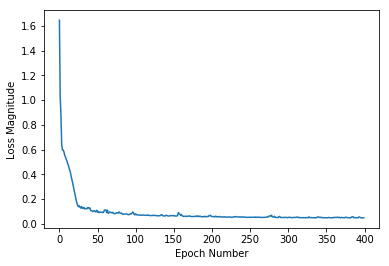

In [18]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
#print("Epoch info: ",history.epoch,"\nValues Info:",history.history,"",)


In [19]:
i = len(history.epoch)
minloss = 1
for i in range(1, len(history.epoch)):
  lossval = history.history['loss'][i]
  if minloss > lossval:
    minloss= lossval
    minlossindex = i
  print("Epoch Number :",history.epoch[i], "\tValue :",lossval)



Epoch Number : 1 	Value : 1.0306444624126359
Epoch Number : 2 	Value : 0.8778618194112842
Epoch Number : 3 	Value : 0.6398539423142504
Epoch Number : 4 	Value : 0.59747780649454
Epoch Number : 5 	Value : 0.5953545458364806
Epoch Number : 6 	Value : 0.5799060899939313
Epoch Number : 7 	Value : 0.5512746852516328
Epoch Number : 8 	Value : 0.5395641358906791
Epoch Number : 9 	Value : 0.5198410585422644
Epoch Number : 10 	Value : 0.50465475512831
Epoch Number : 11 	Value : 0.4827319275612799
Epoch Number : 12 	Value : 0.4666426413811293
Epoch Number : 13 	Value : 0.4427895961991893
Epoch Number : 14 	Value : 0.4275132385676339
Epoch Number : 15 	Value : 0.39519248112736133
Epoch Number : 16 	Value : 0.3689576423408201
Epoch Number : 17 	Value : 0.3392448454295229
Epoch Number : 18 	Value : 0.3108967596652524
Epoch Number : 19 	Value : 0.27933703712969016
Epoch Number : 20 	Value : 0.24717246396029555
Epoch Number : 21 	Value : 0.21954910927170876
Epoch Number : 22 	Value : 0.18986851506985

In [20]:
print("Minimum Loss at iteration: ",minlossindex,"\t With Loss Value:",minloss)

Minimum Loss at iteration:  391 	 With Loss Value: 0.047400757095357716


In [21]:
min(history.history['loss'])

0.047400757095357716

In [22]:
print(model.predict(df.loc[80:80]))

[[0.9617251]]


In [24]:
model.predict(df.loc[80:80]).item(-1)

0.961725115776062

In [38]:
pred_df_array = np.array(['Predicted Output Classes'])
print(pred_df_array)

pred_df_array_round= np.array(['Predicted Output Classes - Rounded'])
print(pred_df_array_round)
#pred_df_array_2 = np.array([1])
#print(pred_df_array_2)

#pred_df_array = np.append(pred_df_array,pred_df_array_2,axis=0)

print(pred_df_array.transpose())

['Predicted Output Classes']
['Predicted Output Classes - Rounded']
['Predicted Output Classes']


In [39]:
df_pred = pd.DataFrame(columns=['Predicted', 'Predicted_Rounded'])
#df_pred = df_pred.append({'Index':1, 'Predicted':22,'Predicted Rounded':33},ignore_index=True)
#df_pred.iloc[[1]]
#df_pred.iloc[0] = (1,1,1)
df_pred

,Predicted,Predicted_Rounded


In [40]:
for i in range(0,149):
  m = model.predict(df.loc[i:i])
  val = m.item(0)
  df_pred_2 = pd.DataFrame({'Predicted':val, 'Predicted_Rounded':round(val)},index=[i])
  #df_pred = df_pred.append({'Index':i, 'Predicted':val,'Predicted Rounded':1},ignore_index=True)
  df_pred = df_pred.append(df_pred_2)
  print(i, val)
  

0 -0.027884192764759064
1 -0.03649670630693436
2 0.029870323836803436
3 -0.04192311316728592
4 0.10074310749769211
5 0.051271192729473114
6 -0.012888200581073761
7 0.02380942553281784
8 -0.051836974918842316
9 -0.05564666539430618
10 0.035293035209178925
11 -0.06874687224626541
12 -0.10096830874681473
13 -0.18168199062347412
14 0.011402003467082977
15 -0.010292895138263702
16 -0.0004223659634590149
17 0.019673816859722137
18 0.025422625243663788
19 0.0017851516604423523
20 0.07713466137647629
21 -0.1121145561337471
22 0.18627843260765076
23 0.11857002228498459
24 0.017422668635845184
25 0.1170186921954155
26 -0.03394848853349686
27 -0.06106949597597122
28 0.04678016155958176
29 0.03720699995756149
30 0.04841511696577072
31 -0.08885014802217484
32 -0.09680671244859695
33 -0.051836974918842316
34 -0.09488917142152786
35 -0.12009990960359573
36 -0.051836974918842316
37 -0.004587359726428986
38 -0.02309931069612503
39 -0.017970271408557892
40 0.04074113816022873
41 -0.005863375961780548
42

In [41]:
len(df_pred)
#df_pred.head(5)

149

In [42]:
#df_raw.head(5)
df_raw.Class

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
119    2
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
Name: Class, Length: 149, dtype: int64

In [43]:
eval_df = pd.DataFrame(df_raw.Class)
len(eval_df)

149

In [0]:
eval_df['Predicted'] = df_pred.Predicted
eval_df['Predicted_Rounded'] = df_pred.Predicted_Rounded

In [45]:
eval_df.head(5)

,Class,Predicted,Predicted_Rounded
0,0,-0.027884,0
1,0,-0.036497,0
2,0,0.029870,0
3,0,-0.041923,0
4,0,0.100743,0


In [46]:
eval_df['Predicted'][0]

-0.027884192764759064

In [0]:
eval_df['SQE_Class_Predicted_Rounded'] = (eval_df.Predicted_Rounded - eval_df.Class)**2


In [0]:
eval_df['SQE_Class_Predicted'] = (eval_df.Predicted - eval_df.Class)**2


In [49]:
eval_df.head(4)

,Class,Predicted,Predicted_Rounded,SQE_Class_Predicted_Rounded,SQE_Class_Predicted
0,0,-0.027884,0,0,0.000778
1,0,-0.036497,0,0,0.001332
2,0,0.029870,0,0,0.000892
3,0,-0.041923,0,0,0.001758


In [0]:
sum_p=0
sum_pr=0
for i in range(0,149):
  sum_p = sum_p + eval_df['SQE_Class_Predicted'][i]
  sum_pr = sum_pr + eval_df['SQE_Class_Predicted_Rounded'][i]

In [51]:
print(sum_p,sum_pr)
len(eval_df)
mean_p = sum_p / len(eval_df)
mean_pr = sum_pr/ len(eval_df)


7.321608356429346 3


In [52]:
print(mean_p,mean_pr)

0.049138311116975475 0.020134228187919462


In [53]:
rmse_p = math.sqrt(mean_p)
rmse_pr = math.sqrt(mean_pr)

print(rmse_p, rmse_pr)

0.22167162903036436 0.14189513095212064


In [54]:
## CHECK CASES where predicted != Desired
cnt = 0
for i in range(0,149):
  if eval_df['Predicted_Rounded'][i] != eval_df['Class'][i]:
    cnt+=1
    print(i,"Desired Value",eval_df['Class'][i],"Predicted",eval_df['Predicted_Rounded'][i] )
  else:
    continue

print("Total Fail = {}".format(cnt))

69 Desired Value 1 Predicted 2
76 Desired Value 1 Predicted 2
82 Desired Value 1 Predicted 2
Total Fail = 3


In [55]:
print(cnt)

3


In [57]:
total_fl = 3/149
print("Accuracy is ",100*(1 - total_fl),"%")

Accuracy is  97.98657718120806 %
